In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("/content/emotions.csv", index_col=False)

In [ ]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
df.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

In [ ]:
df.shape

(2132, 2549)

In [ ]:
df['label'].value_counts()

,count
label,
NEUTRAL,716
NEGATIVE,708
POSITIVE,708


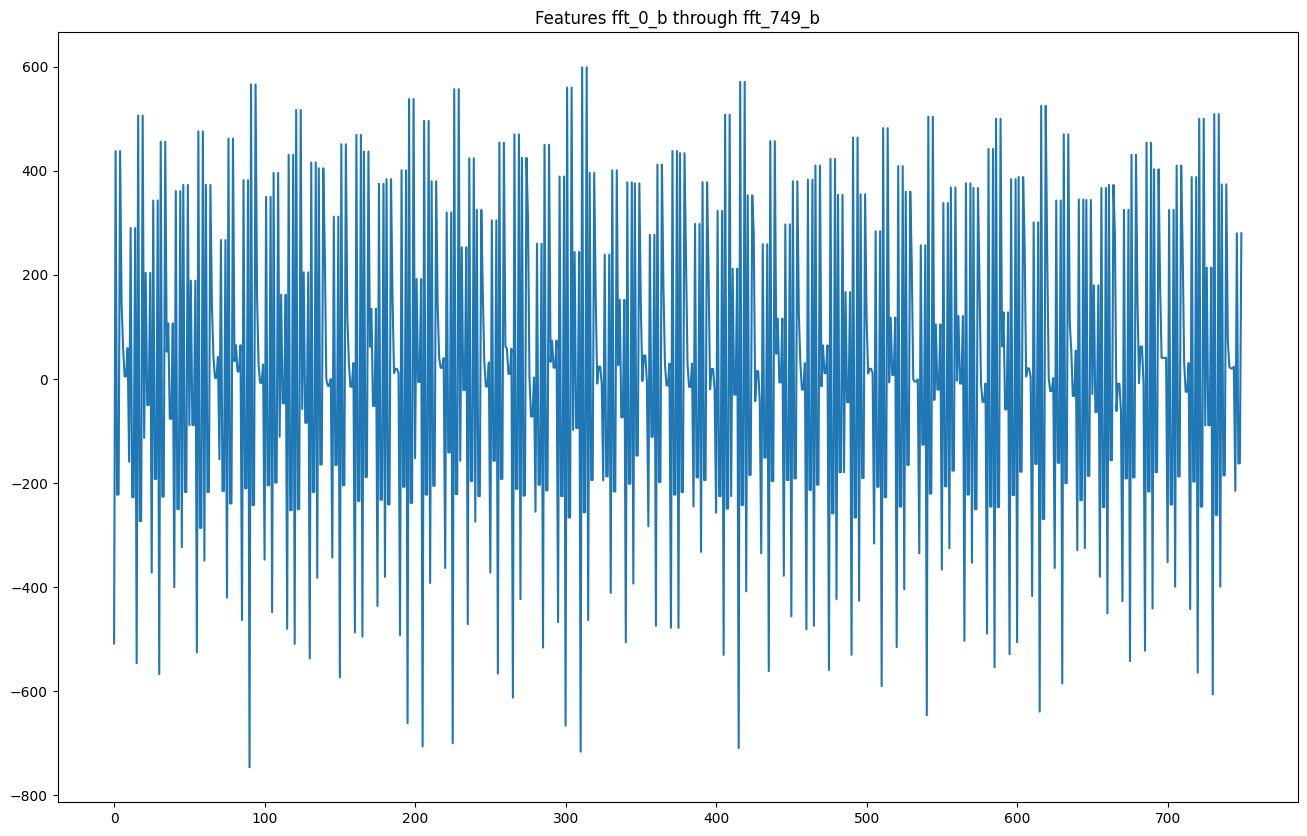

In [ ]:
sample = df.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
#Seperating Positive,Neagtive and Neutral dataframes for plotting
pos = df.loc[df["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = df.loc[df["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = df.loc[df["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

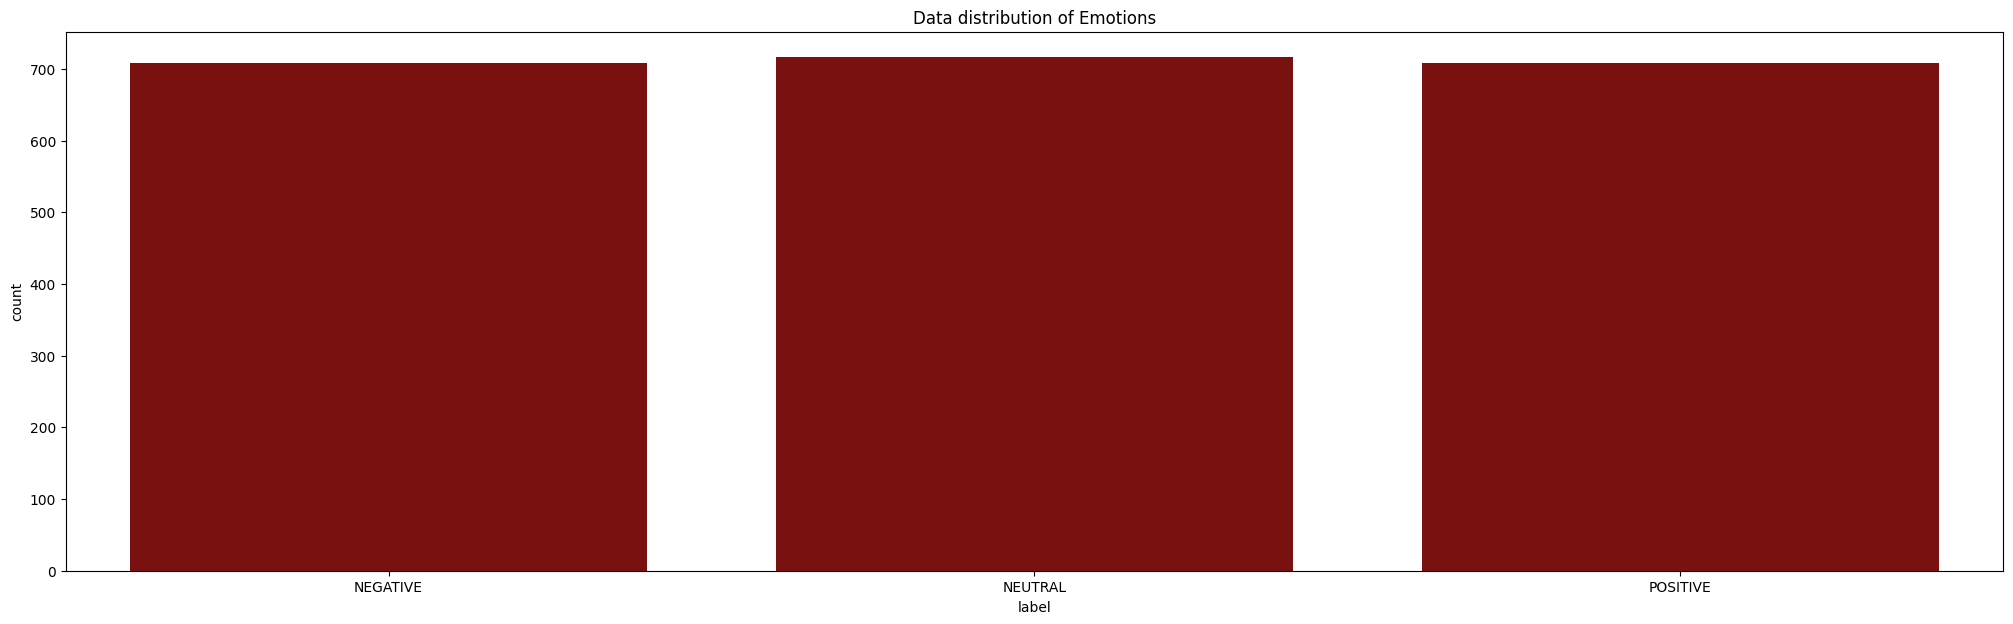

In [ ]:
#plotting Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=df, color='darkred')
plt.show()

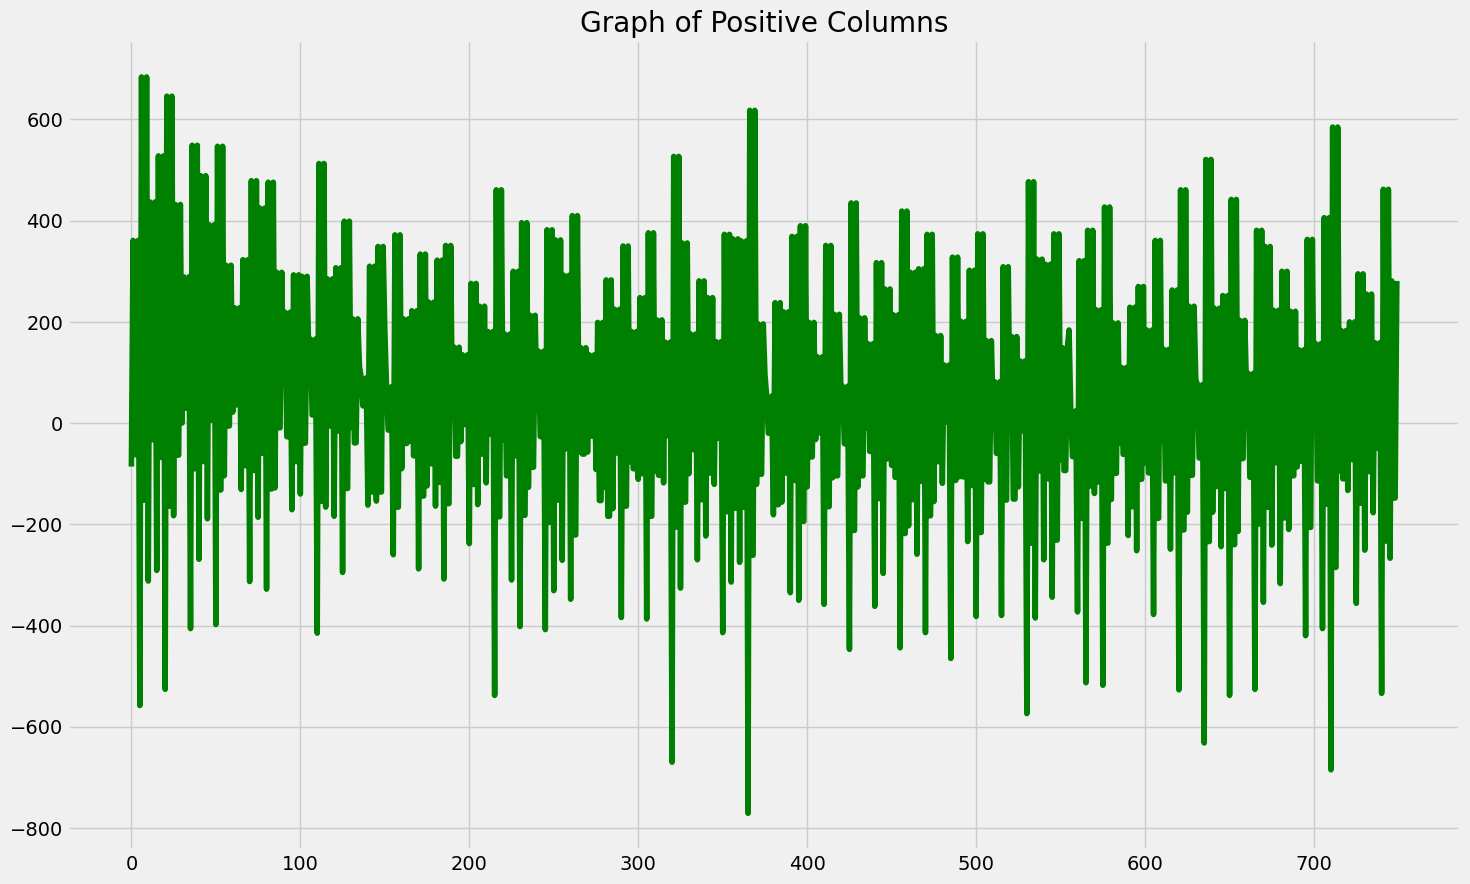

In [ ]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos, color='green')
plt.title("Graph of Positive Columns")
plt.show()

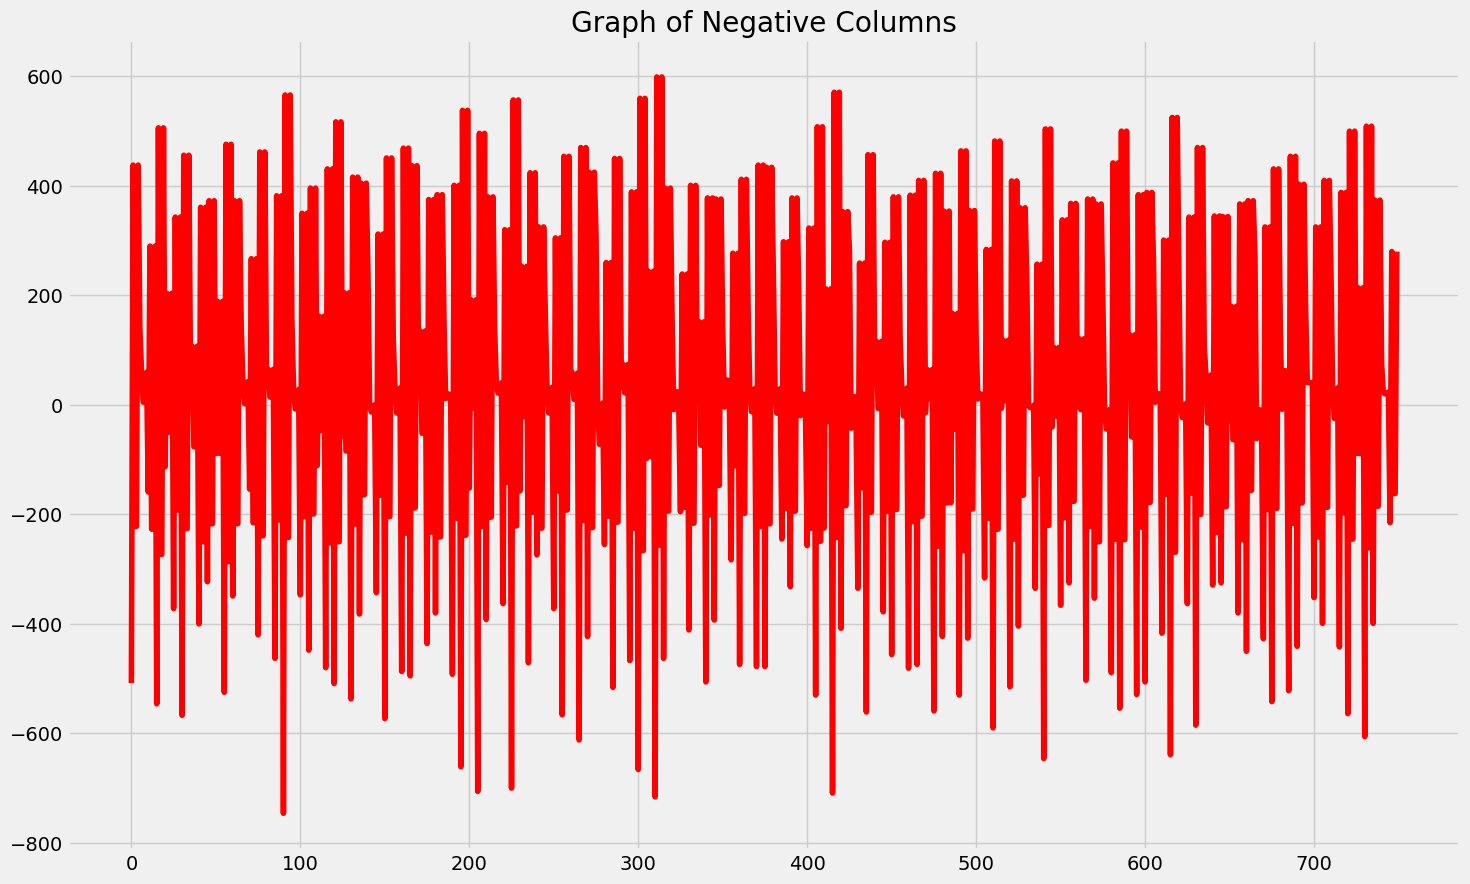

In [ ]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_neg, color='red')
plt.title("Graph of Negative Columns")
plt.show()

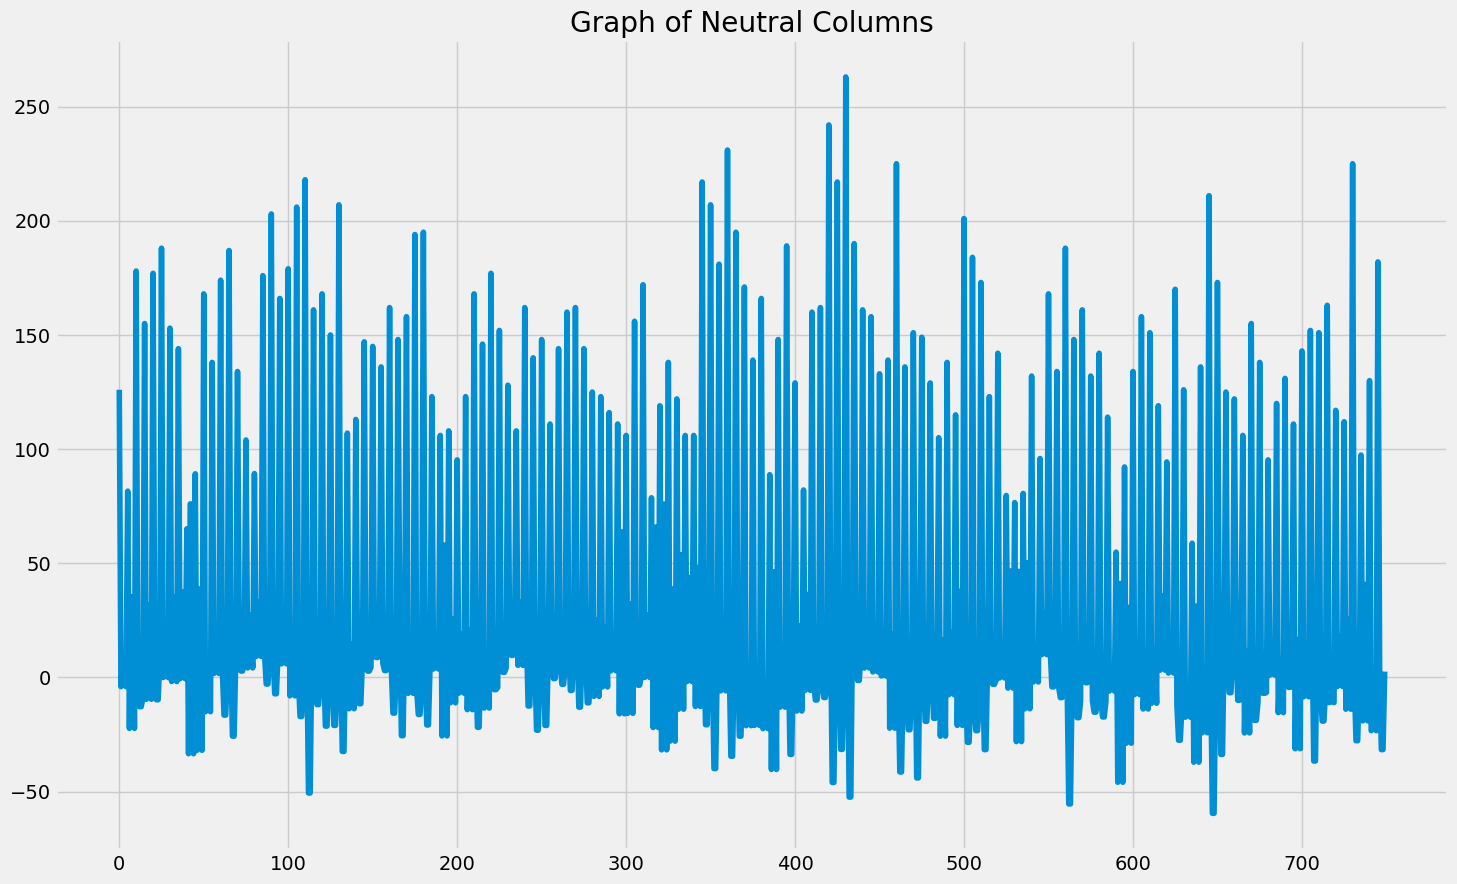

In [ ]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()

In [ ]:
def Transform_Data(df):

    #Transforming Labels to Numbers
    df['label'] = df['label'].map({"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})
    x = df.drop('label', axis=1)
    y = df.loc[:, 'label'].values

    #Scaling Brain Signals
    scalar = StandardScaler()
    scalar.fit(x)
    X = scalar.transform(x)

    #one hot encoding labels
    Y = to_categorical(y)

    return X, Y

In [ ]:
X, Y = Transform_Data(df)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=8)
print("\nX_train & Y_train shape -->  ", X_train.shape, " ", Y_train.shape)
print("\nX_val & Y_val shape -->  ", X_val.shape, " ", Y_val.shape)
print("\nX_test & Y_test shape -->  ", X_test.shape, " ", Y_test.shape)


X_train & Y_train shape -->   (1278, 2548)   (1278, 3)

X_val & Y_val shape -->   (427, 2548)   (427, 3)

X_test & Y_test shape -->   (427, 2548)   (427, 3)


In [ ]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=2))(inputs)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='sigmoid')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
#creating model
lstmmodel = create_model()
#Compiling model
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

None


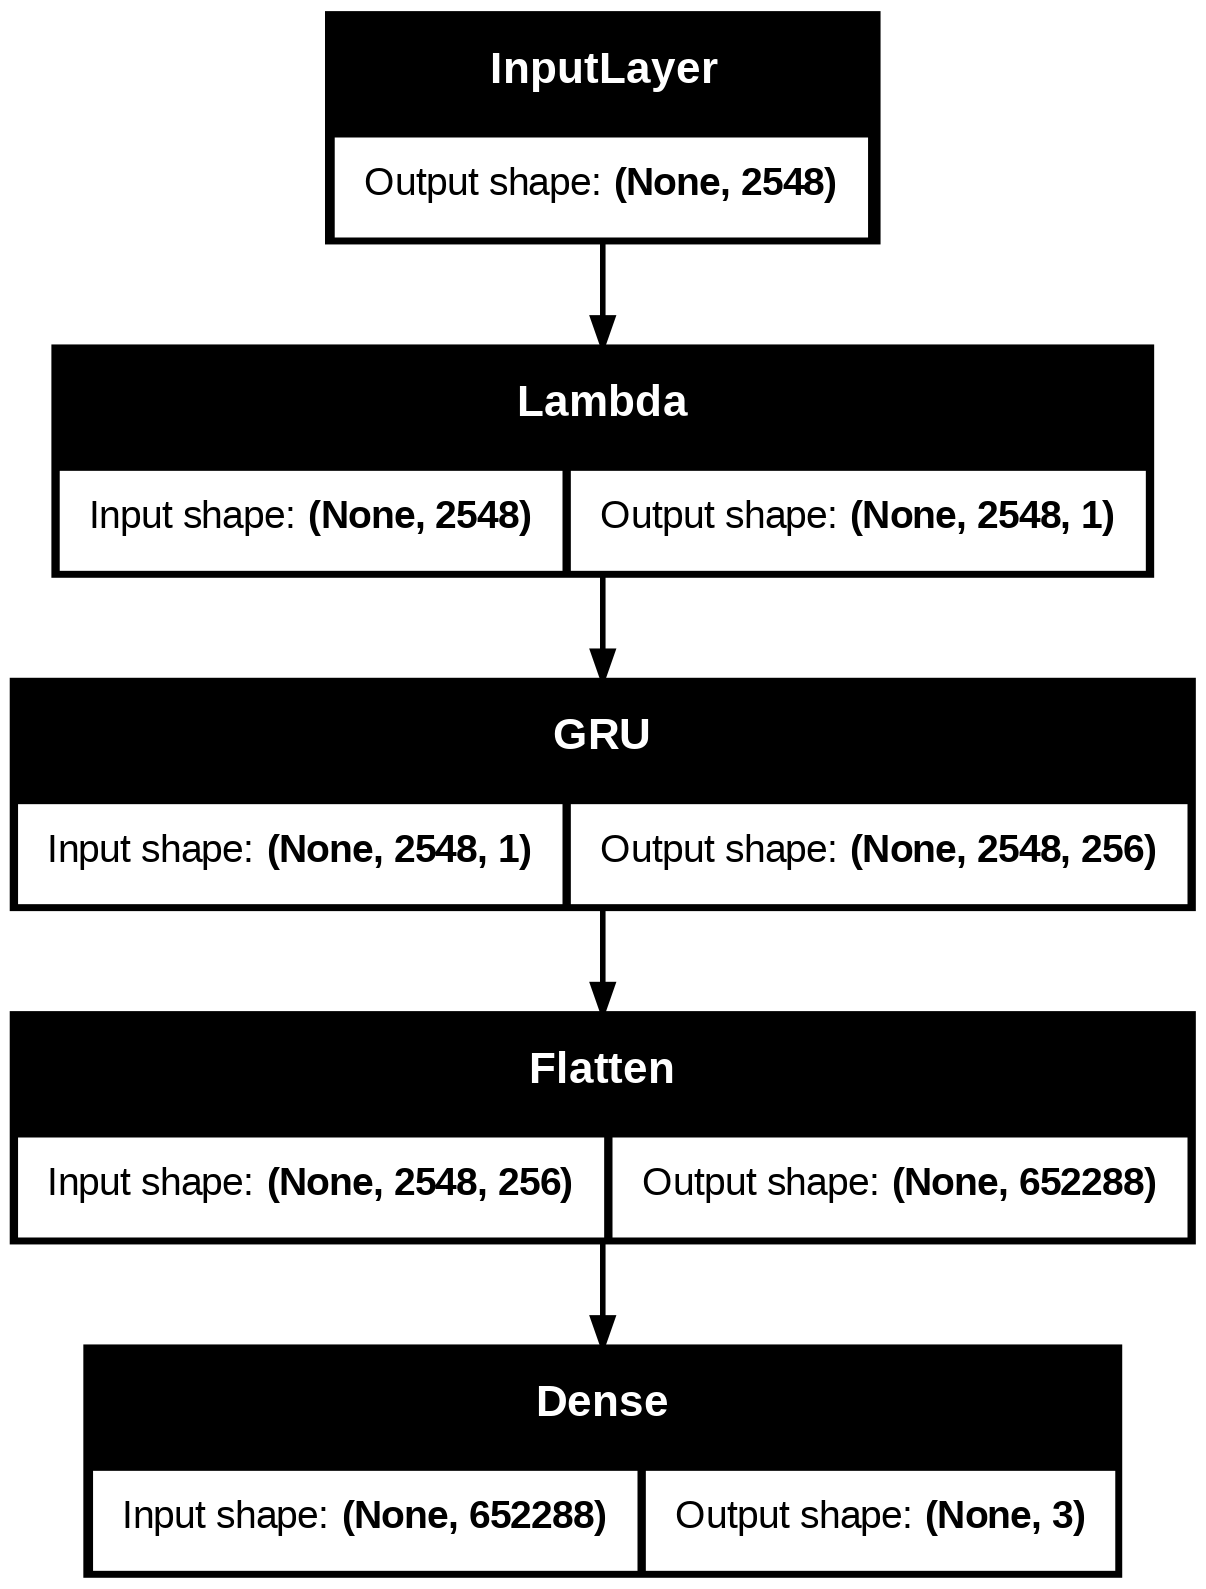

In [ ]:
tf.keras.utils.plot_model(lstmmodel, show_shapes=True)

In [ ]:
history = lstmmodel.fit(X_train, Y_train, epochs = 5, validation_data=(X_val,Y_val))
loss, acc = lstmmodel.evaluate(X_test, Y_test)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 371s 9s/step - accuracy: 0.7783 - loss: 0.8872 - val_accuracy: 0.8735 - val_loss: 0.4274
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 319s 8s/step - accuracy: 0.9194 - loss: 0.2169 - val_accuracy: 0.9204 - val_loss: 0.2784
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 318s 8s/step - accuracy: 0.9755 - loss: 0.0877 - val_accuracy: 0.9133 - val_loss: 0.4506
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 321s 8s/step - accuracy: 0.9641 - loss: 0.1326 - val_accuracy: 0.9133 - val_loss: 0.6264
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 334s 8s/step - accuracy: 0.9622 - loss: 0.1597 - val_accuracy: 0.9297 - val_loss: 0.2845
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9024 - loss: 0.4091


In [ ]:
pred  = lstmmodel.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step


In [ ]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(Y_test,axis=1), np.argmax(lstmmodel.predict(X_test),axis=1) ))

14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.92      0.83      0.87       149
           2       0.86      0.93      0.89       135

    accuracy                           0.92       427
   macro avg       0.92      0.92      0.92       427
weighted avg       0.92      0.92      0.91       427



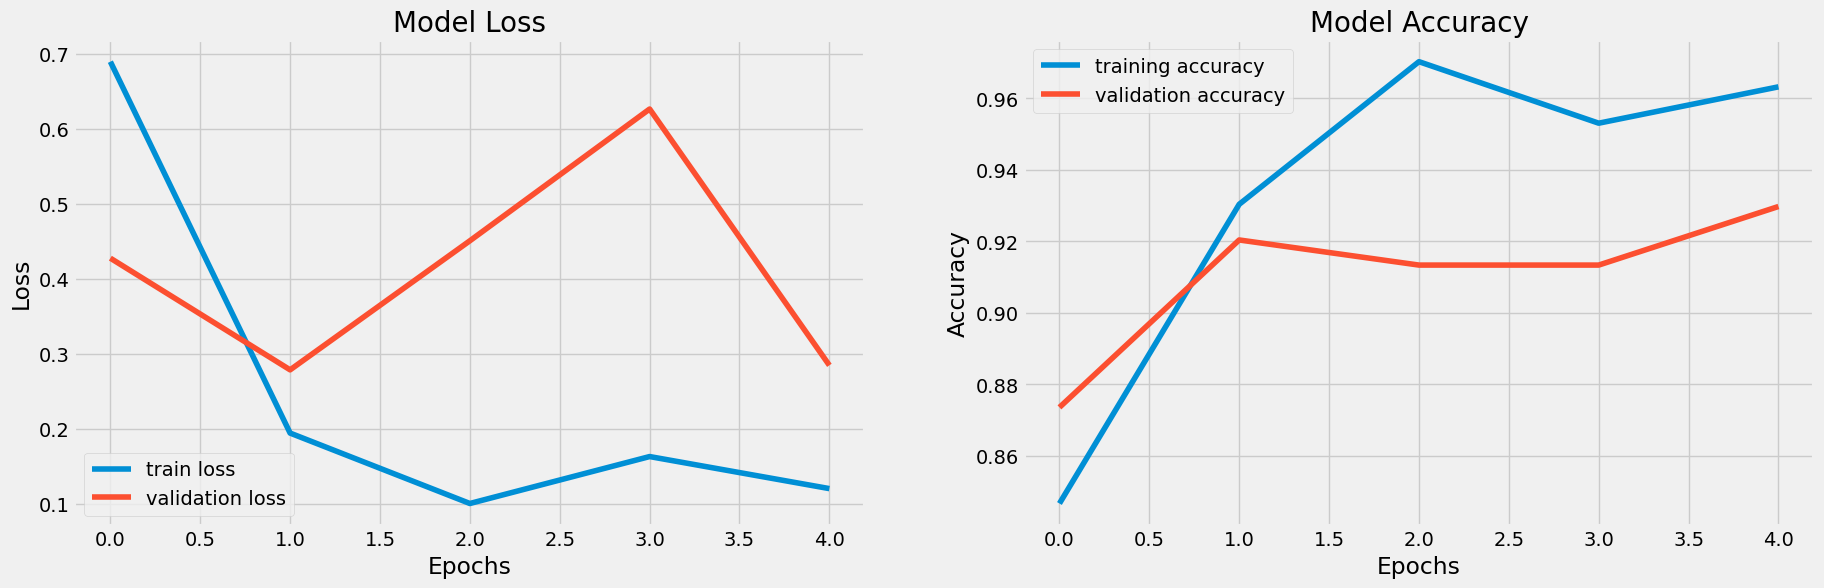

In [ ]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [ ]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [ ]:
#inversing the one hot encoding
y_test1 =   np.argmax(Y_test,axis=1)

Confusion matrix, without normalization
[[142   1   0]
 [  5 124  20]
 [  0  10 125]]


(<Figure size 2000x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

<Figure size 2000x500 with 0 Axes>

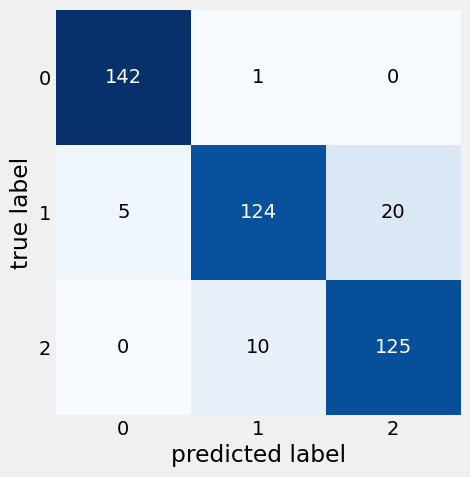

In [ ]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [ ]:
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(X_train, np.argmax(Y_train,axis=1))
pred_svm = Classifier_svm.predict(X_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(Y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_svm)


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       143
           1       0.96      0.89      0.92       149
           2       0.90      0.99      0.94       135

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



In [ ]:
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(X_train, np.argmax(Y_train,axis=1))
pred_LR = Classifier_LR.predict(X_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(Y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_LR)


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       143
           1       0.96      0.87      0.91       149
           2       0.90      0.99      0.94       135

    accuracy                           0.94       427
   macro avg       0.94      0.94      0.94       427
weighted avg       0.94      0.94      0.94       427



In [ ]:
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(X_train, np.argmax(Y_train,axis=1))
pred_dt = Classifier_dt.predict(X_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(Y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_dt)


*		Classification Report Deccsion Tree:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       143
           1       0.97      0.93      0.95       149
           2       0.94      0.99      0.96       135

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



In [ ]:
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(X_train,np.argmax(Y_train,axis=1))
pred_fr = Classifier_dt.predict(X_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(Y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(Y_test,axis=1), pred_fr)


*		Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       143
           1       0.97      0.93      0.95       149
           2       0.94      0.99      0.96       135

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427

